To plot 3D Surface plot from ASPEN Thermodynamics simulations

In [1]:
import numpy as np
import pandas as pd
import time as time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [2]:
def extractcsv(filename):
    file = pd.read_csv(filename, index_col = False, encoding = 'utf-8')
    x = file.iloc[:,0].to_numpy().astype(float)
    y = file.columns[1:].to_numpy().astype(float)
    z = file.iloc[:,1:].to_numpy().astype(float)
    print(file)
    print(len(x), len(y),  z.shape)
    return x,y,z

temp, ch4ratio, z_syngas = extractcsv("Simulation_Syngas.csv")

    Temp/CH4 Feed Ratio      0.05       0.1      0.15       0.2      0.25  \
0                   400  0.642381  0.570020  0.527593  0.497855  0.475136   
1                   425  0.682782  0.610932  0.568151  0.537899  0.514650   
2                   450  0.721881  0.651246  0.608531  0.578061  0.554505   
3                   475  0.759607  0.690930  0.648730  0.618359  0.594740   
4                   500  0.795732  0.729836  0.688646  0.658729  0.635325   
5                   525  0.829825  0.767641  0.728020  0.698960  0.676085   
6                   550  0.861280  0.803815  0.766386  0.738635  0.716645   
7                   575  0.889424  0.837656  0.803067  0.777105  0.756384   
8                   600  0.913689  0.868390  0.837238  0.813529  0.794454   
9                   625  0.933801  0.895347  0.868072  0.846995  0.829889   
10                  650  0.949863  0.918139  0.894928  0.876706  0.861780   
11                  675  0.962299  0.936748  0.917504  0.902162  0.889478   

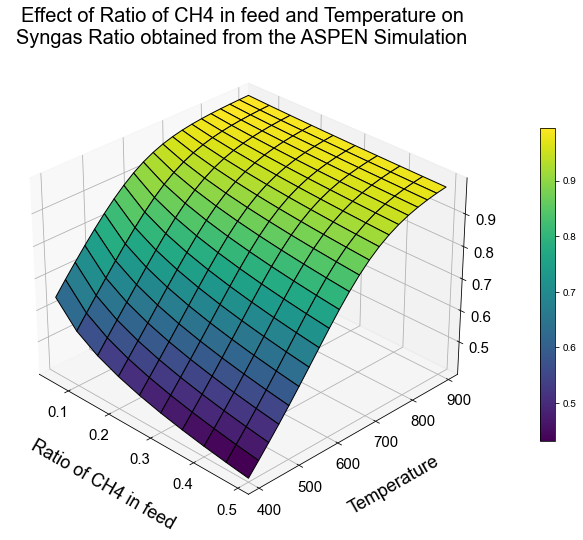

In [3]:
def threedplot(name_arr, x, y, z,**kwargs):
    xname = name_arr[0]
    yname = name_arr[1]
    title = name_arr[2]
    titlesize = 20
    ticksize = 15
    labelsize = 18
    plt.rcParams['axes.labelpad'] = 20
    opts = {"inv_x":False,"inv_y":False}
    opts.update(kwargs)
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(projection="3d")

    XX, YY = np.meshgrid(x,y)
    fig.add_axes(ax)
    surf = ax.plot_surface(XX, YY,z , cmap="viridis", edgecolor="k")
    ax.set_xlabel(xname, fontsize=labelsize)
    ax.set_ylabel(yname, fontsize=labelsize)
    if opts["inv_y"]:
        buffer = (max(y)-min(y))*0.03
        ax.set_ylim(max(y)+buffer, min(y)-buffer)

    if opts["inv_x"]:
        buffer = (max(x)-min(x))*0.03
        ax.set_xlim(max(x)+buffer, min(x)-buffer)
        
    # pretty init view
    ax.view_init(elev=30, azim=135)
    plt.colorbar(surf, ax=ax,shrink=0.5, pad=0.1)
    plt.title("Effect of {} and {} on\n".format(xname, yname,title) + f"{title} obtained from the ASPEN Simulation", fontsize = titlesize)
    plt.xticks(size = ticksize)
    plt.yticks(size = ticksize)
    ax.zaxis.set_tick_params(labelsize=ticksize)
    plt.tight_layout()
    plt.show()
# Surface Plot of effect Ratio of CH4 in feed gas vs Temperature on Syngas Ratio obtained from Aspen simulation results
threedplot(["Ratio of CH4 in feed", "Temperature", "Syngas Ratio"], ch4ratio, temp, z_syngas, inv_y=True, inv_x=True)

    Temp/CH4 Feed Ratio       0.05        0.1       0.15        0.2  \
0                   400  14.606238  11.513829  10.034861   9.109083   
1                   425  20.436924  16.192713  14.147870  12.863813   
2                   450  27.602468  22.046417  19.337010  17.626442   
3                   475  35.987027  29.075051  25.643279  23.458824   
4                   500  45.280474  37.147729  33.007206  30.340845   
5                   525  54.978637  45.977269  41.239571  38.140753   
6                   550  64.448174  55.125786  50.009561  46.595818   
7                   575  73.058887  64.057933  58.866543  55.317686   
8                   600  80.341498  72.242597  67.306213  63.836398   
9                   625  86.093383  79.273198  74.872106  71.684369   
10                  650  90.376253  84.952346  81.255876  78.496680   
11                  675  93.423192  89.299269  86.348965  84.083914   
12                  700  95.524436  92.486734  90.223735  88.443104   
13    

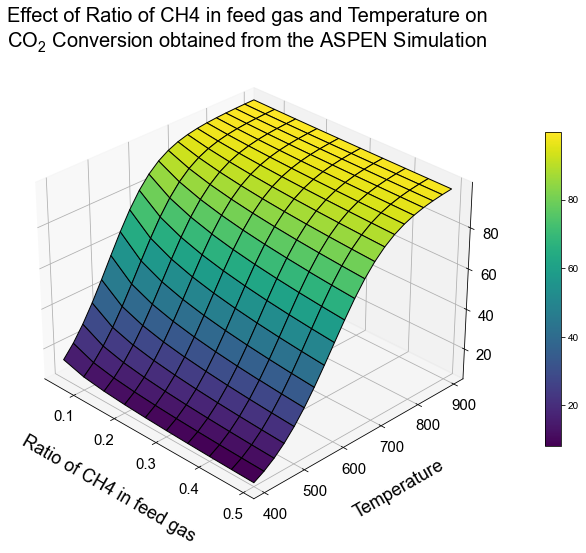

In [4]:
# Surface Plot of effect Ratio of CH4 in feed gas vs Temperature on CO2 conversion obtained from Aspen simulation results
temp, ch4ratio, z_co2 = extractcsv("Simulation_CO2.csv")
threedplot(["Ratio of CH4 in feed gas", "Temperature", "${CO_2}$ Conversion"], ch4ratio, temp, z_co2, inv_y=True, inv_x=True)

    Temp/CH4 Feed Ratio       0.05        0.1       0.15        0.2  \
0                   400  10.175103   7.439131   6.200106   5.452955   
1                   425  14.841463  10.918637   9.123100   8.035111   
2                   450  20.862892  15.499306  13.006313  11.484848   
3                   475  28.264261  21.291639  17.981275  15.940597   
4                   500  36.888245  28.306109  24.114641  21.495683   
5                   525  46.356277  36.406014  31.365946  28.161005   
6                   550  56.087811  45.277037  39.548562  35.824858   
7                   575  65.403547  54.439275  48.312959  44.223997   
8                   600  73.693994  63.321762  57.175731  52.947956   
9                   625  80.576677  71.389556  65.605602  61.495783   
10                  650  85.955844  78.271502  73.144284  69.380506   
11                  675  89.966227  83.824061  79.507723  76.240953   
12                  700  92.860065  88.107096  84.618527  81.906424   
13    

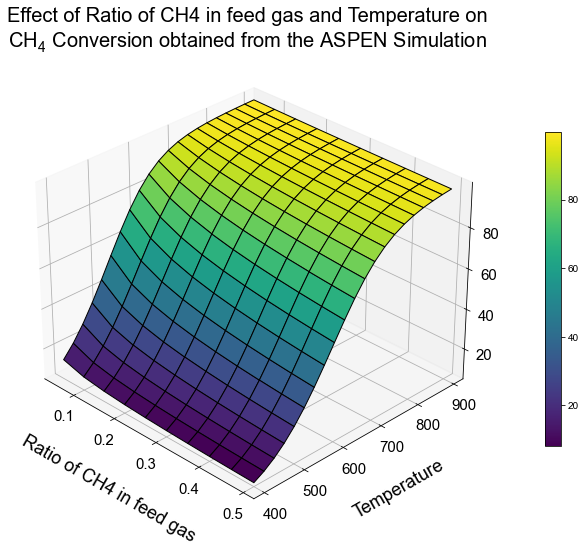

In [5]:
# Surface Plot of effect Ratio of CH4 in feed gas vs Temperature on CH4 conversion for Aspen simulation results
temp, ch4ratio, z_CH4 = extractcsv("Simulation_CH4.csv")
threedplot(["Ratio of CH4 in feed gas", "Temperature", "${CH_4}$ Conversion"], ch4ratio, temp, z_co2, inv_y=True, inv_x=True)